In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('res.pkl', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('res.pkl', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,1560,18.52,NaN,1
1,Bronchus,MaxDose,3480,0.00,NaN,1
2,Chestwall_L,MaxDvh,3000,2.04,NaN,1
3,D2cm,MaxDose,2400,0.00,NaN,1
4,Esophagus,MaxDvh,1880,16.91,NaN,1
5,Esophagus,MaxDose,3000,0.00,NaN,1
6,GreatVes,MaxDvh,4300,5.66,NaN,1
7,GreatVes,MaxDose,4900,0.00,NaN,1
8,Heart,MaxDvh,2800,1.84,NaN,1
9,Heart,MaxDose,3400,0.00,NaN,1


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,Bronchus,MaxDvh,1560.0,983.340717,-36.965339
1,Bronchus,MaxDose,3480.0,2307.798828,-33.683942
2,Chestwall_L,MaxDvh,3000.0,2084.242674,-30.525244
3,D2cm,MaxDose,2400.0,3168.670166,32.027924
4,Esophagus,MaxDvh,1880.0,723.043246,-61.540253
5,Esophagus,MaxDose,3000.0,1201.368164,-59.954395
6,GreatVes,MaxDvh,4300.0,1211.844757,-71.817564
7,GreatVes,MaxDose,4900.0,1718.710693,-64.924272
8,Heart,MaxDvh,2800.0,921.206641,-67.099763
9,Heart,MaxDose,3400.0,1554.253418,-54.286664


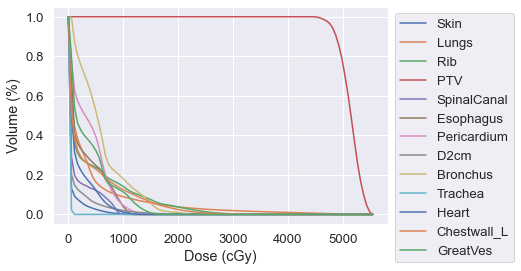

In [7]:
# Dose-volume histograms
result.dvhplot()

In [8]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 1122.73, Linear-Quadratic: 90.23
